In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
from functions_scores import *
dataname = 'Turkey'
X = pd.read_csv("Original_Coordinates.csv")
X_sc = MinMaxScaler().fit_transform(X.loc[:,['x','y']])
pt_cloud = X_sc

In [2]:
# rc = gd.RipsComplex(pt_cloud, max_edge_length = maxDist(pt_cloud)/2)
# st = rc.create_simplex_tree(max_dimension = 2)
# L = st.get_filtration()
# my_data =[list(simplex) for simplex in L]

In [3]:
# Sage için gerekli bilgiler
print("Maksimum epsilon değeri:", np.round(maxDist(pt_cloud)/2,2))
print("Matris Boyutları:", pt_cloud.shape[0])

Maksimum epsilon değeri: 0.61
Matris Boyutları: 81


In [4]:
# with open('Complexes_Data/'+ dataname +'_complexes.txt', "w") as file:  # save the simplices with epsilon to use in SageMath
#     file.write(json.dumps(my_data))
# file.close()

# After Sage

In [5]:
Methods = ['single',  'average', 'complete', 'ward']
Metrics = ['braycurtis', 'cosine', 'euclidean','cityblock']
# n_cluster  = len(np.unique(y))
n_cluster = 7

## Homological and Minkowski Distance with p = 1/2

In [6]:
hom_distance = All2One("Matrix_Data/"+ dataname + "_result/*.npy")
minkowski = squareform(pdist(pt_cloud, minkowski_distance))

# Silhouette Scores

In [7]:
Unsup_Silhoutte = Sil_Scores(Methods, Metrics, pt_cloud, minkowski, hom_distance, 7, silhouette_score)
Unsup_Silhoutte

,silhouette_score,method
braycurtis,0.308705,ward
cosine,0.049513,ward
euclidean,0.389017,average
cityblock,0.385608,complete
minkowski,0.361855,complete
homological,0.515658,average


In [8]:
Unsup_Silhoutte.to_csv('Scores/'+ dataname +'/silhouette.csv')

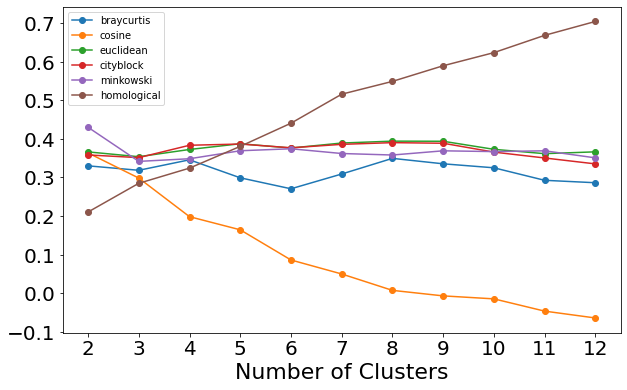

In [11]:
sil_score_plot_1(Methods, Metrics,pt_cloud, minkowski, hom_distance, np.arange(2,13), silhouette_score, dataname)

In [12]:
Entropy(Methods, Metrics, pt_cloud, minkowski, hom_distance, n_cluster)

,single,average,complete,ward
braycurtis,0.535164,1.473768,1.605485,1.847436
cosine,1.395522,1.814658,1.838036,1.897992
euclidean,0.694994,1.911295,1.901718,1.890123
cityblock,0.90507,1.894193,1.902189,1.888911
minkowski,0.90507,1.894193,1.902189,1.888911
homological,0.90507,1.894193,1.902189,1.888911


---------------------------